# Assignment 1
## Task 1
Suppose we have a two-class classification problem, where we denote
the two classes with $+1$ and $-1$. Further assume that the joint
distribution of $\mathbf{x}$ and $y$, $p(\mathbf{x},y)$, is known and that
the distributions of the two classes do not overlap, i.e.
$$
\min\{p(\mathbf{x}|y=+1),p(\mathbf{x}|y=-1)\}=0.
$$
Determine an optimal classification function $g$ and compute the
generalization error using the zero-one loss function.

### Solution
Since $p(\mathbf{x},y)$, is known, we can also compute the marginals $p(\mathbf{x})$ and $p(y)$ by averaging(i.e. integrating or summing) over variables( e.g. if we are interested in $p(\mathbf{x})$, we need to average over $y$). Then, by definition of conditional probability, we can also compute $p(\mathbf{x}|y)=\frac{p(\mathbf{x},y)}{p(y)}$ and similarly $p(y|\mathbf{x})$. According to the slides, we can therefore find an optimal classifier, given by any function $g$ that satisfies
\begin{eqnarray*}
		\label{eq:minrisk} g(\mathbf{x}) \ \left\{
		\begin{array}{lll}
		> \ 0 & \mbox{for} &  p\left(y=1 \mid \mathbf{x} \right) \ > \
		p\left(y=-1 \mid \mathbf{x} \right)\\
		< \ 0 & \mbox{for} & p\left(y=-1 \mid \mathbf{x} \right) \ > \ p\left(y=1
		\mid \mathbf{x} \right)
		\end{array} \right.
	\end{eqnarray*}
Moreover,by the definition of conditional probability(or also known as Bayes' Theorem), we have
$$
p(y|\mathbf{x})=\frac{p(\mathbf{x}|y)p(y)}{p(\mathbf{x})}.
$$
This immediately leads to the conclusion that $\min\{p(\mathbf{x}|y=+1),p(\mathbf{x}|y=-1)\}=0$ if and only if $\min\{ p(y=+1 \mid \mathbf{x}), p(y=-1 \mid \mathbf{x}) \}=0$. 
We also know from the slides how the minimal risk can be computed and therefore conclude: 
\begin{equation*}
		 \begin{split}
			R_{\mathrm{min}} %& =  \int_{X}  \min\{ p\left(\mathbf{x},y=-1\right), p\left(\mathbf{x},y=1\right) \} \ d\mathbf{x} \\
			                 & =\int_{X}  \min\{ p\left(y=-1 \mid \mathbf{x} \right), p\left(y=1 \mid \mathbf{x}\right) \} \ p(\mathbf{x}) \ d\mathbf{x}=0 .
		\end{split}
	\end{equation*}

## Task 2
Assume that the two classes in data set ${\tt DataSet6}$ are
distributed according to multivariate normal distributions. Estimate
the means and covariance matrices as well as $p(y=+1)$ and $p(y=-1)$
from the data (you may use all 200 samples), compute an optimal
classification function (see slide 9) and visualize it
graphically(a two-dimensional plot suffices). 

### Solution

Cov of positve class= [[ 0.97776086 -0.63279722]
 [-0.63279722  0.96214327]]
Cov of negative class= [[1.18686086 0.55312556]
 [0.55312556 0.98948508]]
Mean of positve class= [-0.23072318  1.0973771 ]
Mean of negative class= [0.72081505 2.3428049 ]
P(y=1)= 0.6716417910447762
P(y=-1)= 0.32835820895522383
Value of A= [[0.64132121 1.80808986]
 [1.80808986 0.44294787]]
Value of w= [ 1.54525683 -1.02711802]
Value of b= 3.083468597232569


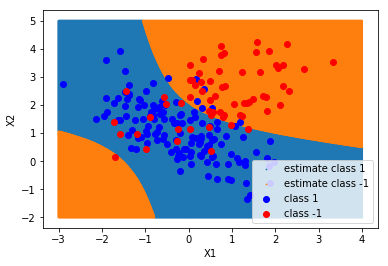

In [5]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

#read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet6.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1]
#further split features according to labels
Xpos=X[y==1]
Xneg=X[y==-1]
#compute mean and covariance
meanXpos=np.mean(Xpos.T,axis=1)
meanXneg=np.mean(Xneg.T,axis=1)
covXpos=np.cov(Xpos.T)
covXneg=np.cov(Xneg.T)
#compute distribution p(y=+-1)
p_ypos=Xpos.T.shape[1]/X.shape[0]
p_yneg=1-p_ypos
#print corresponding values
print("Cov of positve class=", covXpos)
print("Cov of negative class=", covXneg)
print("Mean of positve class=", meanXpos)
print("Mean of negative class=", meanXneg)
print("P(y=1)=", p_ypos)
print("P(y=-1)=", p_yneg)
#compute inverses of covariance matrices
covXpos_inv = np.linalg.inv(covXpos)
covXneg_inv = np.linalg.inv(covXneg)
#compute parameters of discrimination function g according to slide 9
A= covXpos_inv - covXneg_inv
w = np.matmul(covXpos_inv, meanXpos) - np.matmul(covXneg_inv, meanXneg)
b = (-1/2*np.matmul(np.matmul(meanXpos, covXpos_inv), meanXpos)
+ 1/2*np.matmul(np.matmul(meanXneg, covXneg_inv), meanXneg)
- 1/2 * np.log(np.linalg.det(covXpos)) + 1/2 * np.log(np.linalg.det(covXneg))
+ np.log(p_ypos) - np.log(p_yneg) )
#Print corresponding values
print("Value of A=", A)
print("Value of w=", w)
print("Value of b=", b)
#Create grid and use it to evaluate g
X1, X2 = np.mgrid[-3:4:500j, -2:5:500j]
points = np.c_[X1.ravel(), X2.ravel()]
g = -1/2*np.sum(np.dot(points, A) * points, axis=1) + np.dot(points, w) + b
#Create Plot
plt.scatter(X1,X2, g > 0, label="estimate class 1")
plt.scatter(X1,X2, g < 0, label="estimate class -1")
plt.scatter(Xpos[:,0],Xpos[:,1], color= 'blue', label="class 1")
plt.scatter(Xneg[:,0],Xneg[:,1], color='red', label="class -1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc=4)
plt.show()

## Task 3
### Part 1
Given the model class $M$ of all exponential distributions with 
parameter
$\lambda$.
i.e. $M=\{f_{\lambda}(x) \mid \lambda > 0\}$ with
$$
      f_{\lambda}(x) = \begin{cases}\displaystyle
                         \lambda {\rm e}^{-\lambda x} & x \ge 0 \\
			0 & x < 0
                      \end{cases} 
$$
Derive a formula for the maximum likelihood estimator $\lambda^*$ for the parameter 
$\lambda$.

Hint: Maximize the logarithm of the likelihood function instead of the 
likelihood function
itself.

### Solution
Assume that $\mathbf{x}=(x_1,...,x_n)$, where the $x_i$s are iid, according to an exponential distribution with parameter $\lambda$ . Without restriction we can work with positive $x_i$'s. The liklehood can then be computed, according to the slides, as
\begin{align*}
		\mathcal{L}(\{\mathbf{x}\}; \lambda) = p(\{\mathbf{x}\};\lambda\}) =  \prod_{i=1}^n p(x_i ; \lambda)=\prod_{i=1}^n f_{\lambda}(x_i)=\lambda^n \prod_{i=1}^n e^{-\lambda x_i}.
	\end{align*}
Now we take the logarithm and obtain
\begin{align*}
		 \log(\mathcal{L}(\{\mathbf{x}\}; \lambda)) = n \log(\lambda)-\lambda \sum_{i=1}^n x_i. 
	\end{align*}
Taking the derivative wrt. $\lambda$ yields
$$
\frac{\partial \log(\mathcal{L}(\{\mathbf{x}\}; \lambda))}{\partial \lambda}=\frac{n}{\lambda}-\sum_{i=1}^n x_i.
$$
Setting the above expression to $0$, finally leads us to the following result for the optimal $\lambda^*$:
$$
\lambda^*=\frac{n}{\sum_{i=1}^n x_i}.
$$

### Part 2
 Apply the formula for $\lambda^*$ from the previous part to the data of ${\tt DataSet7}$. Visualize the 
density defined by this optimal $\lambda^*$ and compare it to the 
true data distribution (e.g. by using a histogram).

### Solution

Estimated lambda =  3.120304521828994


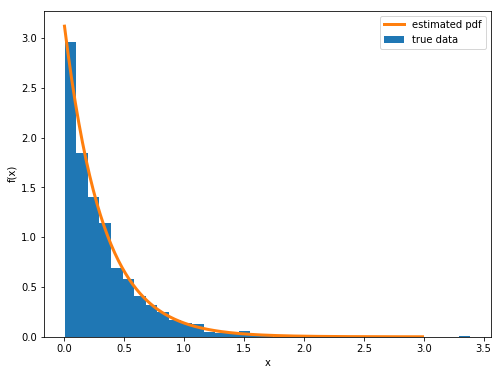

In [6]:
# load the data
data = np.genfromtxt('DataSet7.csv', delimiter=',', skip_header=1)
# estimate the parameter according to the previously derived formula
lambd_est = len(data)/np.sum(data)
print('Estimated lambda = ',lambd_est)
#Define function that computes estimated pdf
def f(x_i, lambd):
    if x_i < 0:
        return 0
    return lambd * np.exp(-lambd * x_i)
#Evaluate f on points with distance 0.01 in interval [0,3], store values
x = np.arange(0, 3.0, 0.01)
y = [f(x_i, lambd_est) for x_i in x]
#Make plot
plt.figure(figsize = (8,6))
plt.hist(data, 35, density = True, label = 'true data')
plt.plot(x, y, label = 'estimated pdf', linewidth = 3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()